In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.metrics import accuracy_score
from pickle import dump
from sklearn.model_selection import GridSearchCV

In [2]:
df = pd.read_csv("/workspaces/betaniammc-machine-learning/data/processed/df_diabetes")

In [3]:
#df = df.drop("Insulin", axis=1)

In [4]:
# Dividimos el conjunto de datos en muestras de train y test
X = df.drop(["Outcome"], axis=1)
y = df["Outcome"]

# Instancia de: from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=18)

In [5]:
model = RandomForestClassifier(random_state = 42)
model.fit(X_train, y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


## visualizacion del arbol

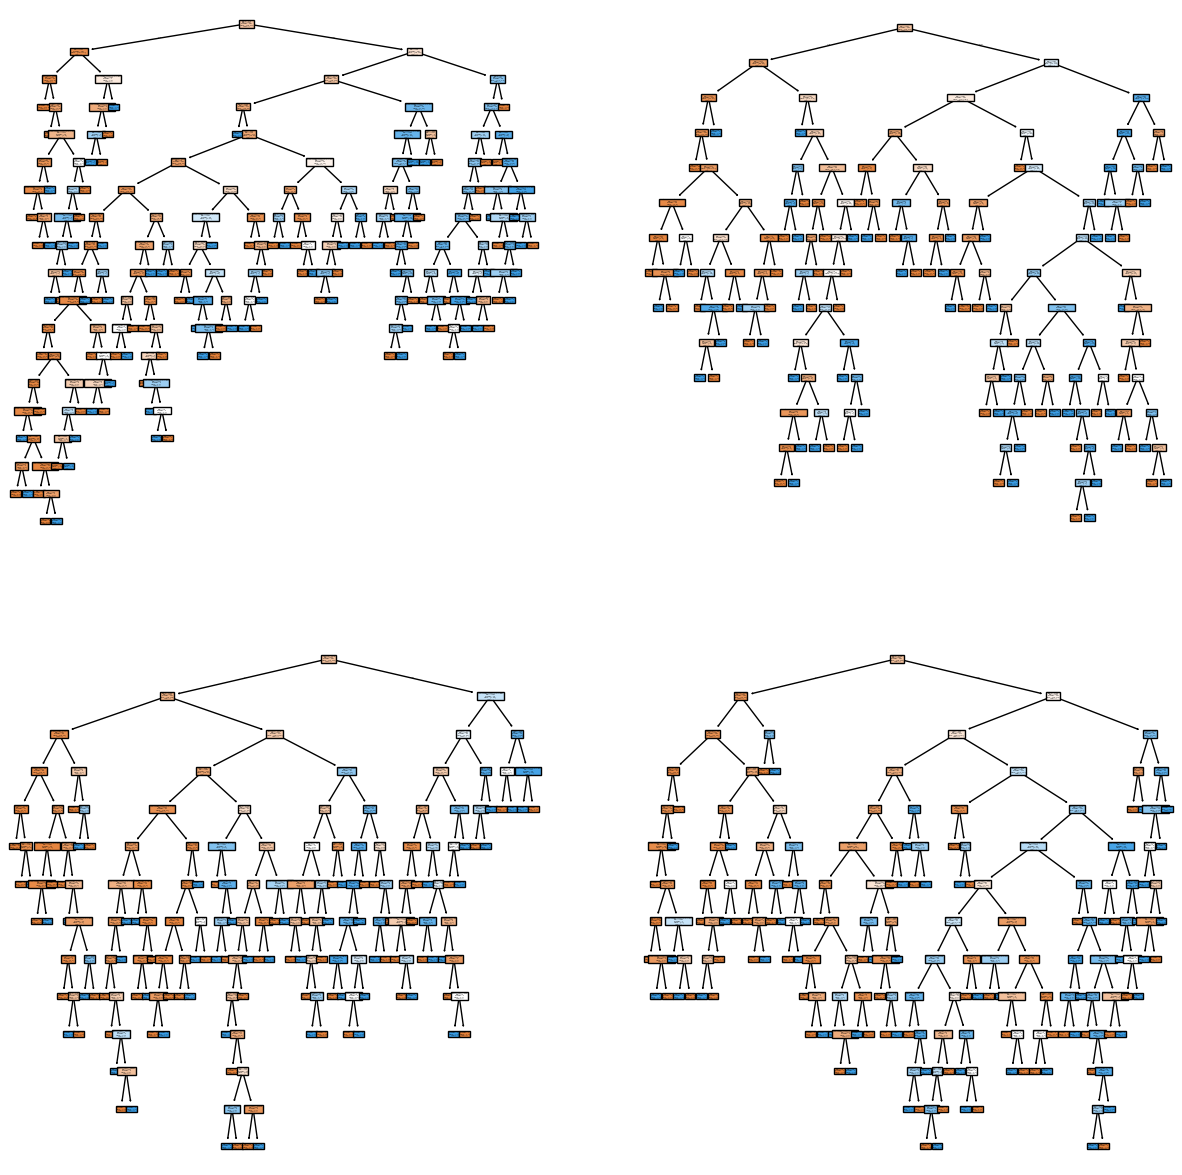

In [6]:
fig, axis = plt.subplots(2, 2, figsize = (15, 15))

# We show the first 4 trees out of the 100 generated (default)
tree.plot_tree(model.estimators_[0], ax = axis[0, 0], feature_names = list(X_train.columns), class_names = ["0", "1"], filled = True)
tree.plot_tree(model.estimators_[1], ax = axis[0, 1], feature_names = list(X_train.columns), class_names = ["0", "1"], filled = True)
tree.plot_tree(model.estimators_[2], ax = axis[1, 0], feature_names = list(X_train.columns), class_names = ["0", "1"], filled = True)
tree.plot_tree(model.estimators_[3], ax = axis[1, 1], feature_names = list(X_train.columns), class_names = ["0", "1"], filled = True)

plt.show()

# prediccion del modelo

In [7]:
y_pred_test = model.predict(X_test)
y_pred_train = model.predict(X_train)

In [8]:

accuracy_score(y_test, y_pred_test)

0.7337662337662337

In [9]:
accuracy_score(y_train, y_pred_train)

1.0

In [10]:
# Definimos los parámetros que queremos ajustar a mano
hyperparams = {'n_estimators': [40, 50, 60] ,
               'max_depth': [4, 5, 6],
                'min_samples_split': [2, 5, 10],
                'min_samples_leaf': [1, 2, 4]}



# Inicializamos la cuadrícula
grid_diabetes = GridSearchCV(RandomForestClassifier(random_state=18),
                    hyperparams,
                    cv=5,
                    n_jobs=-1,
                    verbose=1)
grid_diabetes.fit(X_train, y_train)

grid_diabetes.best_params_  

Fitting 5 folds for each of 81 candidates, totalling 405 fits


{'max_depth': 5,
 'min_samples_leaf': 1,
 'min_samples_split': 10,
 'n_estimators': 50}

In [11]:
model = RandomForestClassifier(max_depth=5, min_samples_leaf=1, min_samples_split=10, n_estimators= 50, random_state = 42)
model.fit(X_train, y_train)
y_pred_test = model.predict(X_test)
y_pred_train = model.predict(X_train)
accuracy_score(y_test, y_pred_test), accuracy_score(y_train, y_pred_train)

(0.7662337662337663, 0.8501628664495114)

entre los resultados este ha sido el mejor

In [12]:
# Definimos los parámetros que queremos ajustar a mano
hyperparams = {'n_estimators': [50, 60, 70] ,
               'max_depth': [5],
                'min_samples_split': [10,11,12],
                'min_samples_leaf': [1, 2]}



# Inicializamos la cuadrícula
grid_diabetes = GridSearchCV(RandomForestClassifier(random_state=18),
                    hyperparams,
                    cv=5,
                    n_jobs=-1,
                    verbose=1)
grid_diabetes.fit(X_train, y_train)

grid_diabetes.best_params_  

Fitting 5 folds for each of 18 candidates, totalling 90 fits


{'max_depth': 5,
 'min_samples_leaf': 1,
 'min_samples_split': 11,
 'n_estimators': 50}

In [13]:
model = RandomForestClassifier(max_depth=5, min_samples_leaf=1, min_samples_split=11, n_estimators= 50, random_state = 42)
model.fit(X_train, y_train)
y_pred_test = model.predict(X_test)
y_pred_train = model.predict(X_train)
accuracy_score(y_test, y_pred_test), accuracy_score(y_train, y_pred_train)

(0.7597402597402597, 0.8501628664495114)